# Project: Investigate a Dataset - Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [127]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [155]:
#Load and display data 
df = pd.read_csv('tmdb-movies.csv', sep=',',skipinitialspace=True)
pd.options.display.max_columns = None
display(df.head(5))

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [129]:
#Get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This dataframe has 10866 rows and 21 columns. There are missing values for several columns (imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies). Data types seem to be correct.

In [130]:
#Get number of unique original titles in the list
print(df['original_title'].nunique())
df.shape[0]-df['original_title'].nunique()

10571


295

There are 10866 rows but only 10571 unique original titles, meaning that there are 295 entries in this list with repeated original titles. 

In [141]:
#Find duplicates
print(sum(df.duplicated()))
dup = df[df.duplicated()]
dup

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [142]:
#Print duplicated rows
df.query('id == 42194')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [143]:
#Investigate what's happening with the duplicate original titles - are they actually the same movie?
dup_title = df[df["original_title"].duplicated()]
dup_title

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,survivor,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,profession|evil doll|possession|murder|problem...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",friends|playwright,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,brother brother relationship|brother-in-law|lo...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,climate change|earth|global warming|water poll...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
1707,79896,tt1336006,0.310600,0,0,The Revenant,Chris Wylde|David Anders|Louise Griffiths|Jacy...,http://www.therevenantmovie.com/,D. Kerry Prior,What could be worse than having your best frie...,police|vigilante|blood|gangster|revenant,A horror movie/buddy comedy about Joey and his...,110,Comedy|Horror,Putrefactory Limited|Wanko Toys,8/16/09,30,5.5,2009,0.000000e+00,0.000000e+00
1753,36465,tt0992993,0.250389,0,0,Into the Storm,Brendan Gleeson|Iain Glen|James D'Arcy|Janet M...,http://www.hbo.com/movies/into-the-storm/index...,Thaddeus O'Sullivan,NaN,england|world war ii|prime minister|political ...,Continuing the storyline of The Gathering Stor...,100,Drama|History|Foreign,NaN,5/31/09,13,5.8,2009,0.000000e+00,0.000000e+00
1757,21398,tt1220213,0.321244,5000000,0,Grace,Jordan Ladd|Samantha Ferris|Gabrielle Rose|Ste...,NaN,Paul Solet,Love. Undying.,NaN,In the wake of a horrific car accident that ki...,94,Horror|Thriller,ArieScope Pictures|Dark Eye Entertainment|Leom...,8/14/09,21,4.9,2009,5.082002e+06,0.000000e+00
1865,220903,tt1533395,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,http://www.bbc.co.uk/programmes/b00lbpcy,Martha Holmes|Simon Blakeney|Stephen Lyle,From the Makers of Planet Earth,plants|animal species|biology|wildlife|ecology,David Attenborough's legendary BBC crew explai...,500,Documentary,British Broadcasting Corporation (BBC),12/14/09,24,7.0,2009,0.000000e+00,0.000000e+00
2036,41505,tt1179069,0.794885,22000000,851517,Shelter,Julianne Moore|Jonathan Rhys Meyers|Jeffrey De...,http://www.shelter-movie.jp/index.html,BjÃ¶rn Stein|MÃ¥ns MÃ¥rlind,Evil will rise.,soul|faith|supernatural|murder|fear,A female forensic psychiatrist discovers that ...,112,Horror|Mystery|Thriller,NALA Films|IM Global|Maraci/Edelstein Films|Sh...,3/27/10,112,5.5,2010,2.200000e+07,8.515170e+05


In [144]:
#Are movies with the same original title actually the same movie?
df.query('original_title == "A Christmas Carol"') 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1416,17979,tt1067106,1.714887,200000000,325233863,A Christmas Carol,Gary Oldman|Jim Carrey|Steve Valentine|Daryl S...,http://disney.go.com/disneypictures/achristmas...,Robert Zemeckis,Season's Greedings,holiday|victorian england|money|christmas eve|...,Miser Ebenezer Scrooge is awakened on Christma...,96,Animation|Drama,Walt Disney|ImageMovers,11/4/09,619,6.6,2009,2.032801e+08,3.305678e+08
2489,16716,tt0216621,0.521573,0,0,A Christmas Carol,Patrick Stewart|Richard E. Grant|Joel Grey|Ian...,NaN,David Hugh Jones,NaN,holiday|scrooge|ghost,Scrooge is a miserly old businessman in 1840's...,95,Drama|Fantasy,Turner Network Television (TNT)|Hallmark Enter...,12/5/99,23,6.1,1999,0.000000e+00,0.000000e+00
7917,13189,tt0087056,0.542315,0,0,A Christmas Carol,George C. Scott|Roger Rees|David Warner|Susann...,NaN,Clive Donner,A new powerful presentation of the most loved ...,holiday|future|scrooge|christmas,An old bitter miser who makes excuses for his ...,100,TV Movie|Fantasy|Drama|Comedy|Family,Entertainment Partners Ltd.,12/17/84,29,6.6,1984,0.000000e+00,0.000000e+00


In [145]:
df.query('original_title == "The Hole"') 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1537,45650,tt1085779,0.582583,0,0,The Hole,Chris Massoglia|Haley Bennett|Nathan Gamble|Br...,http://www.theholein3d.com/,Joe Dante,What Are You So Afraid Of?,basement|hole|little brother,"After moving into a new neighbourhood, brother...",92,Thriller|Adventure|Fantasy,Bold Films|BenderSpink,9/9/09,131,5.7,2009,0.0,0.0
2695,467,tt0242527,0.718104,0,0,The Hole,Thora Birch|Desmond Harrington|Keira Knightley...,NaN,Nick Hamm,"Once you get in, you can't get out.",jealousy|obsession|claustrophobia|bunker|thirst,Four teenagers at a British private school sec...,102,Crime|Drama|Horror|Thriller,Cowboy Films|Film Council|Granada Film Product...,4/20/01,92,6.2,2001,0.0,0.0


It seems that although the original title are the same, movies are not the same. 

In [146]:
df.query('runtime == 0')['id'].count()

31

There are 31 movies with runtime equal to zero, which seems incorrect for a movie.

In [147]:
df[(df.budget == 0) & (df.revenue == 0)].shape


(4701, 21)

There are 4701 movies in this dataset with budget and revenue equal to zero. 

In [148]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [149]:
print(df['budget_adj'].mean())

17551039.8229


Note: There are a lot of movies in this sample with revenue and budget equal to zero. Although this might be true, it does not seem realistic for such a large number of movies, specially for some with very famous actors. We could replace the zeros with the mean, but there are also movies with very high revenues that would distort the mean. We could also replace with the median, but there are so many movies with 0 that the median is zero. Given that this data seems to be more focused on popularity, maybe revenue and budget figures are really not accurate and we should not rely on them. 

### Data Cleaning

Issues identified before:
1. Duplicated rows
2. Runtime = 0 -> does not make sense for a movie -> replace with average
3. Missing values: there are several columns with NaN. We could delete these but I believe we should first check which of those columns affect what we are trying to investigate, otheriwse we will be deleting observations without a reason. We can also delete colums that we will not be using.

In [156]:
#Remove duplicate row
df.drop_duplicates(inplace=True)

In [157]:
#Replace runtime 0 with the average runtime
df['runtime'].replace(0,df['runtime'].mean(axis=0),inplace=True)

In [158]:
#Check if there is still any runtime = 0
df.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [159]:
#Delte columns that will not be used
df.drop(columns = ['cast','homepage','director','tagline','keywords','overview','production_companies'],inplace=True)

In [160]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the year with highest vote_average ? And with the lowest?

In [170]:
vote_by_year = df.groupby("release_year")['vote_average'].mean()
print(vote_by_year.nlargest(1), vote_by_year.nsmallest(1))

release_year
1973    6.703636
Name: vote_average, dtype: float64 release_year
2012    5.79983
Name: vote_average, dtype: float64


1973 seems to be the year with the highest vote_average (6.7) and 2012 the one with the lowest (5.8)

### Research Question 2: What's the evolution of the number of releases?

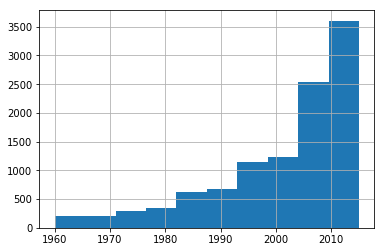

In [172]:
#Number of releases on each year
df['release_year'].hist();

In [173]:
release_by_year = df.groupby('release_year')['id'].count()
print(release_by_year.tail(1), release_by_year.head(1), release_by_year.nlargest(1))

release_year
2015    629
Name: id, dtype: int64 release_year
1960    32
Name: id, dtype: int64 release_year
2014    700
Name: id, dtype: int64


The number of releases per year seems to have been increasing exponentially. In 2015 the number of releases was 629, compared to 32 in 1960. 2014 was the year with more releases

### Research Question 3: What is the most popular movie? Is it also the one with the highest revenue? Are popularity and revenue related?

In [174]:
print(df['popularity'].nlargest(1))
print(df['revenue'].nlargest(1))

0    32.985763
Name: popularity, dtype: float64
1386    2781505847
Name: revenue, dtype: int64


The most popular movie is actually the first one in the table. The movie with the highest revenue is not the same. Let's see what are their original titles

In [175]:
print(df['original_title'].iloc[0])
print(df['original_title'].iloc[1386])

Jurassic World
Avatar


In [176]:
df['popularity'].corr(df['revenue'])

0.66336028141259062

There seems to be a moderate positive relationship. 

In [177]:
median_pop = df['popularity'].median()
low_pop = df.query('popularity < {}'.format(median_pop))
high_pop = df.query('popularity >= {}'.format(median_pop))
mean_rev_low_pop = low_pop['revenue'].mean()
mean_rev_high_pop = high_pop['revenue'].mean()
print(mean_rev_high_pop, mean_rev_low_pop)

75727871.4272 3919311.56314


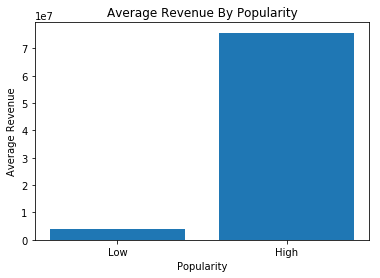

In [178]:
#Create bar chart to show average revenue for movies with low popularity and high popularity
locations = [1, 2]
heights = [mean_rev_low_pop, mean_rev_high_pop]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Revenue By Popularity")
plt.xlabel('Popularity')
plt.ylabel('Average Revenue');

As expected, popular movies seem to have higher average revenues.

### Research Question 4: Are Action movies more popular than Drama?

In [179]:
#Split genres column
genres = df.genres.str.split("|", n = 10, expand = True)
genres.head(5)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


We can see that the maximum number of genres for each movie is 5, so we will need to create new 5 columns in our dataframe. We should also drop the original genres column.

In [180]:
df2 = df

In [181]:
df2[['genre1','genre2','genre3','genre4','genre5']] = df2.genres.str.split("|", n = 10, expand = True)
df2.drop(columns=['genres'], inplace=True)

In [182]:
df2.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124.0,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,120.0,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,119.0,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136.0,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,137.0,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [183]:
#df2.str.contains('Action')
#df_action = df2.apply(lambda row: row.astype(str).str.contains('Action').any(), axis=1)
df_action = df2.query('genre1 == "Action"' or 'genre2 = "Action"' or 'genre3 = "Action"' or 'genre4 = "Action"' or 'genre5 = "Action"')
action_pop = df_action['popularity'].mean()

In [184]:
df_drama = df2.query('genre1 == "Drama"' or 'genre2 = "Drama"' or 'genre3 = "Drama"' or 'genre4 = "Drama"' or 'genre5 = "Drama"')
drama_pop = df_drama['popularity'].mean()

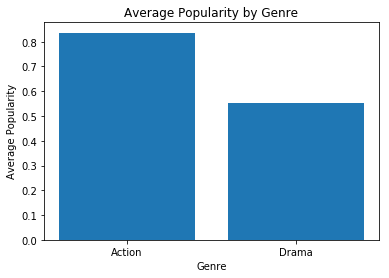

In [185]:
locations = [1, 2]
heights = [action_pop, drama_pop]
labels = ["Action", "Drama"]
plt.bar(locations, heights, tick_label=labels)
plt.title("Average Popularity by Genre")
plt.xlabel('Genre')
plt.ylabel('Average Popularity');

<a id='conclusions'></a>
## Conclusions

According to our analysis, the number of releases per year has been steadly increasing since 1960. 1973 was the higher with highest vote average and 20112 the one with the lowest. The most popular movie is Jurassic Park and the one that generated the highest revenue is Avatar. Revenue and popularity seem to be positively correlated. Finally, Action movies seem to be more popular than Drama. 
A lot of movies have revenue equal to zero, which does not sem very realistic. The median of revenue is also zero. We did not change these values. Changing them for the mean could also be misleading as there are movies with very high revenues. A percentage of the difference of revenue between popular and not so popular movies might be due to lack of accurate data (as movies are less popular, less data on revenues is disclosed, or it's more difficult to find). So, less popular movies might not necessarily mean revenue equal to zero.

In [186]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0